# KNN

## Merge Later

Item 3. Realize experimentos com algoritmos diversos e selecione o melhor algoritmo com base em uma métrica de avaliação de interesse. Justifique a escolha da métrica. Dependendo do algoritmo, faça experimentos com variação de parâmetros (e.g., valor do parâmetro k, do algoritmo kNN).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

In [2]:
data = pd.read_csv('star_classification.csv')

data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [3]:
id_columns = ['obj_ID', 'run_ID', 'rerun_ID', 'cam_col',
              'field_ID', 'spec_obj_ID', 'plate', 'MJD',
              'fiber_ID']

df = data.drop(columns=id_columns, axis=1)

X = df.drop(columns=['class'], axis=1)
y = df['class']

X.shape, y.shape

((100000, 8), (100000,))

In [4]:
df['class'].value_counts(normalize=True)

class
GALAXY    0.59445
STAR      0.21594
QSO       0.18961
Name: proportion, dtype: float64

### Apresentação do *dataset*

O [Stellar Classification Dataset - SDSS17](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17?resource=download) é uma base de dados que classifica objetos estelares com base em suas características espectrais. Esse *dataset* contém 100.000 instâncias classificadas dentre estrelas, galáxias e quasares, provenientes de observações

### Aplicando árvore de decisão

In [5]:
def decision_tree_classifier_evaluate_depth(
        x_y_dataframe: tuple,
        min_depth: int,
        max_depth: int,
        min_samples_leaf: int = 1,
):
    """Function to evaluate the Decision Tree Classifier with different depths.

    Args:
        x_y_dataframe (tuple): A tuple containing the dataframe split into
            X and y, where y is a pandas.Series containing the labels.
        min_depth (int): The range minimum depth
        max_depth (int): The range maximum depth
        min_samples_leaf (int, optional): Defaults to 1.
    """
    X, y = x_y_dataframe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for i in range(min_depth, max_depth+1):
        model = DecisionTreeClassifier(
            criterion='entropy',
            max_depth=i,
            random_state=42,
            min_samples_leaf=min_samples_leaf,
        )

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        matrix = confusion_matrix(y_test, y_pred, normalize='true')
        precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)

        report = (f'Tree Max Depth: {i}\n'
                  f'Accuracy: {acc}\n'
                  f'Precision: {precision}\n'
                  f'Recall: {recall}\n'
                  f'F-Score: {fscore}\n'
                  f'Support: {support}\n')

        sns.heatmap(matrix, annot=True)
        plt.title(report)
        plt.show()

        print('----------------------------------------------------')

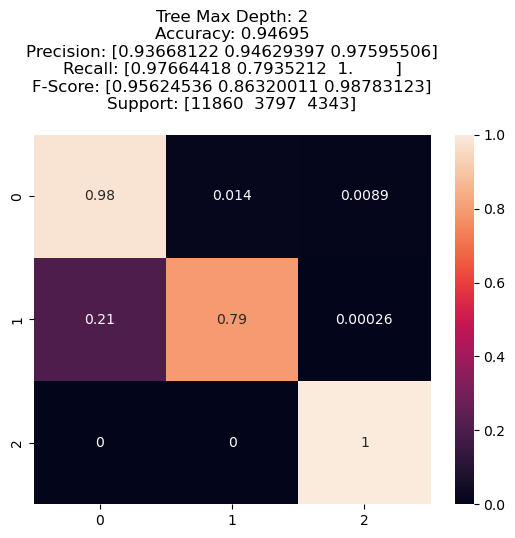

----------------------------------------------------


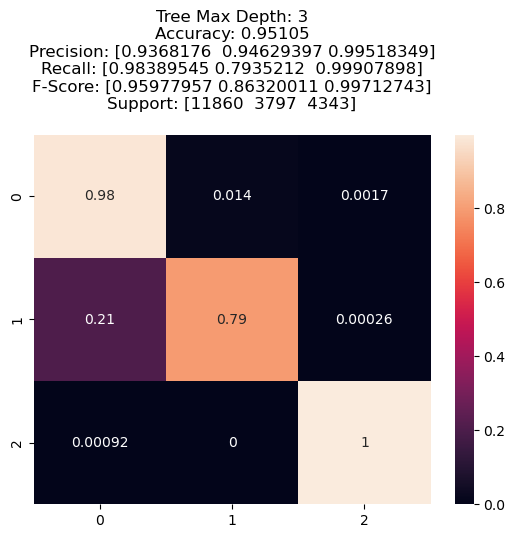

----------------------------------------------------


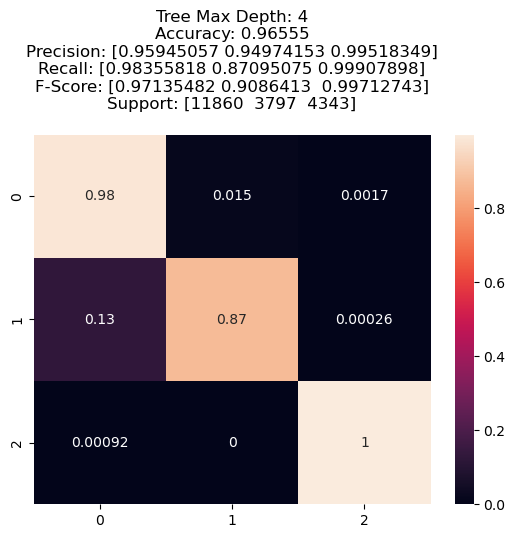

----------------------------------------------------


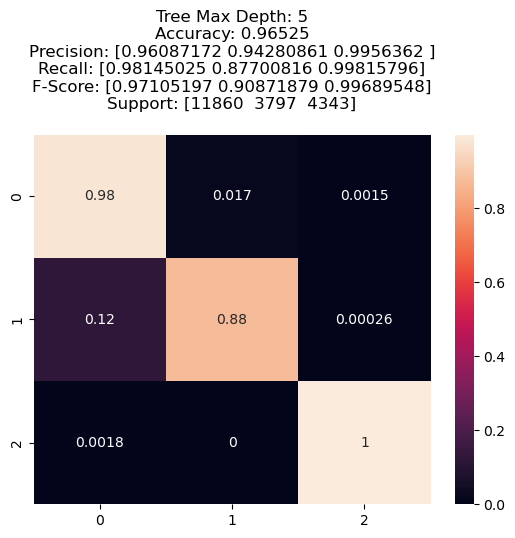

----------------------------------------------------


In [6]:
decision_tree_classifier_evaluate_depth(
    x_y_dataframe=(X, y),
    min_depth=2,
    max_depth=5,
)

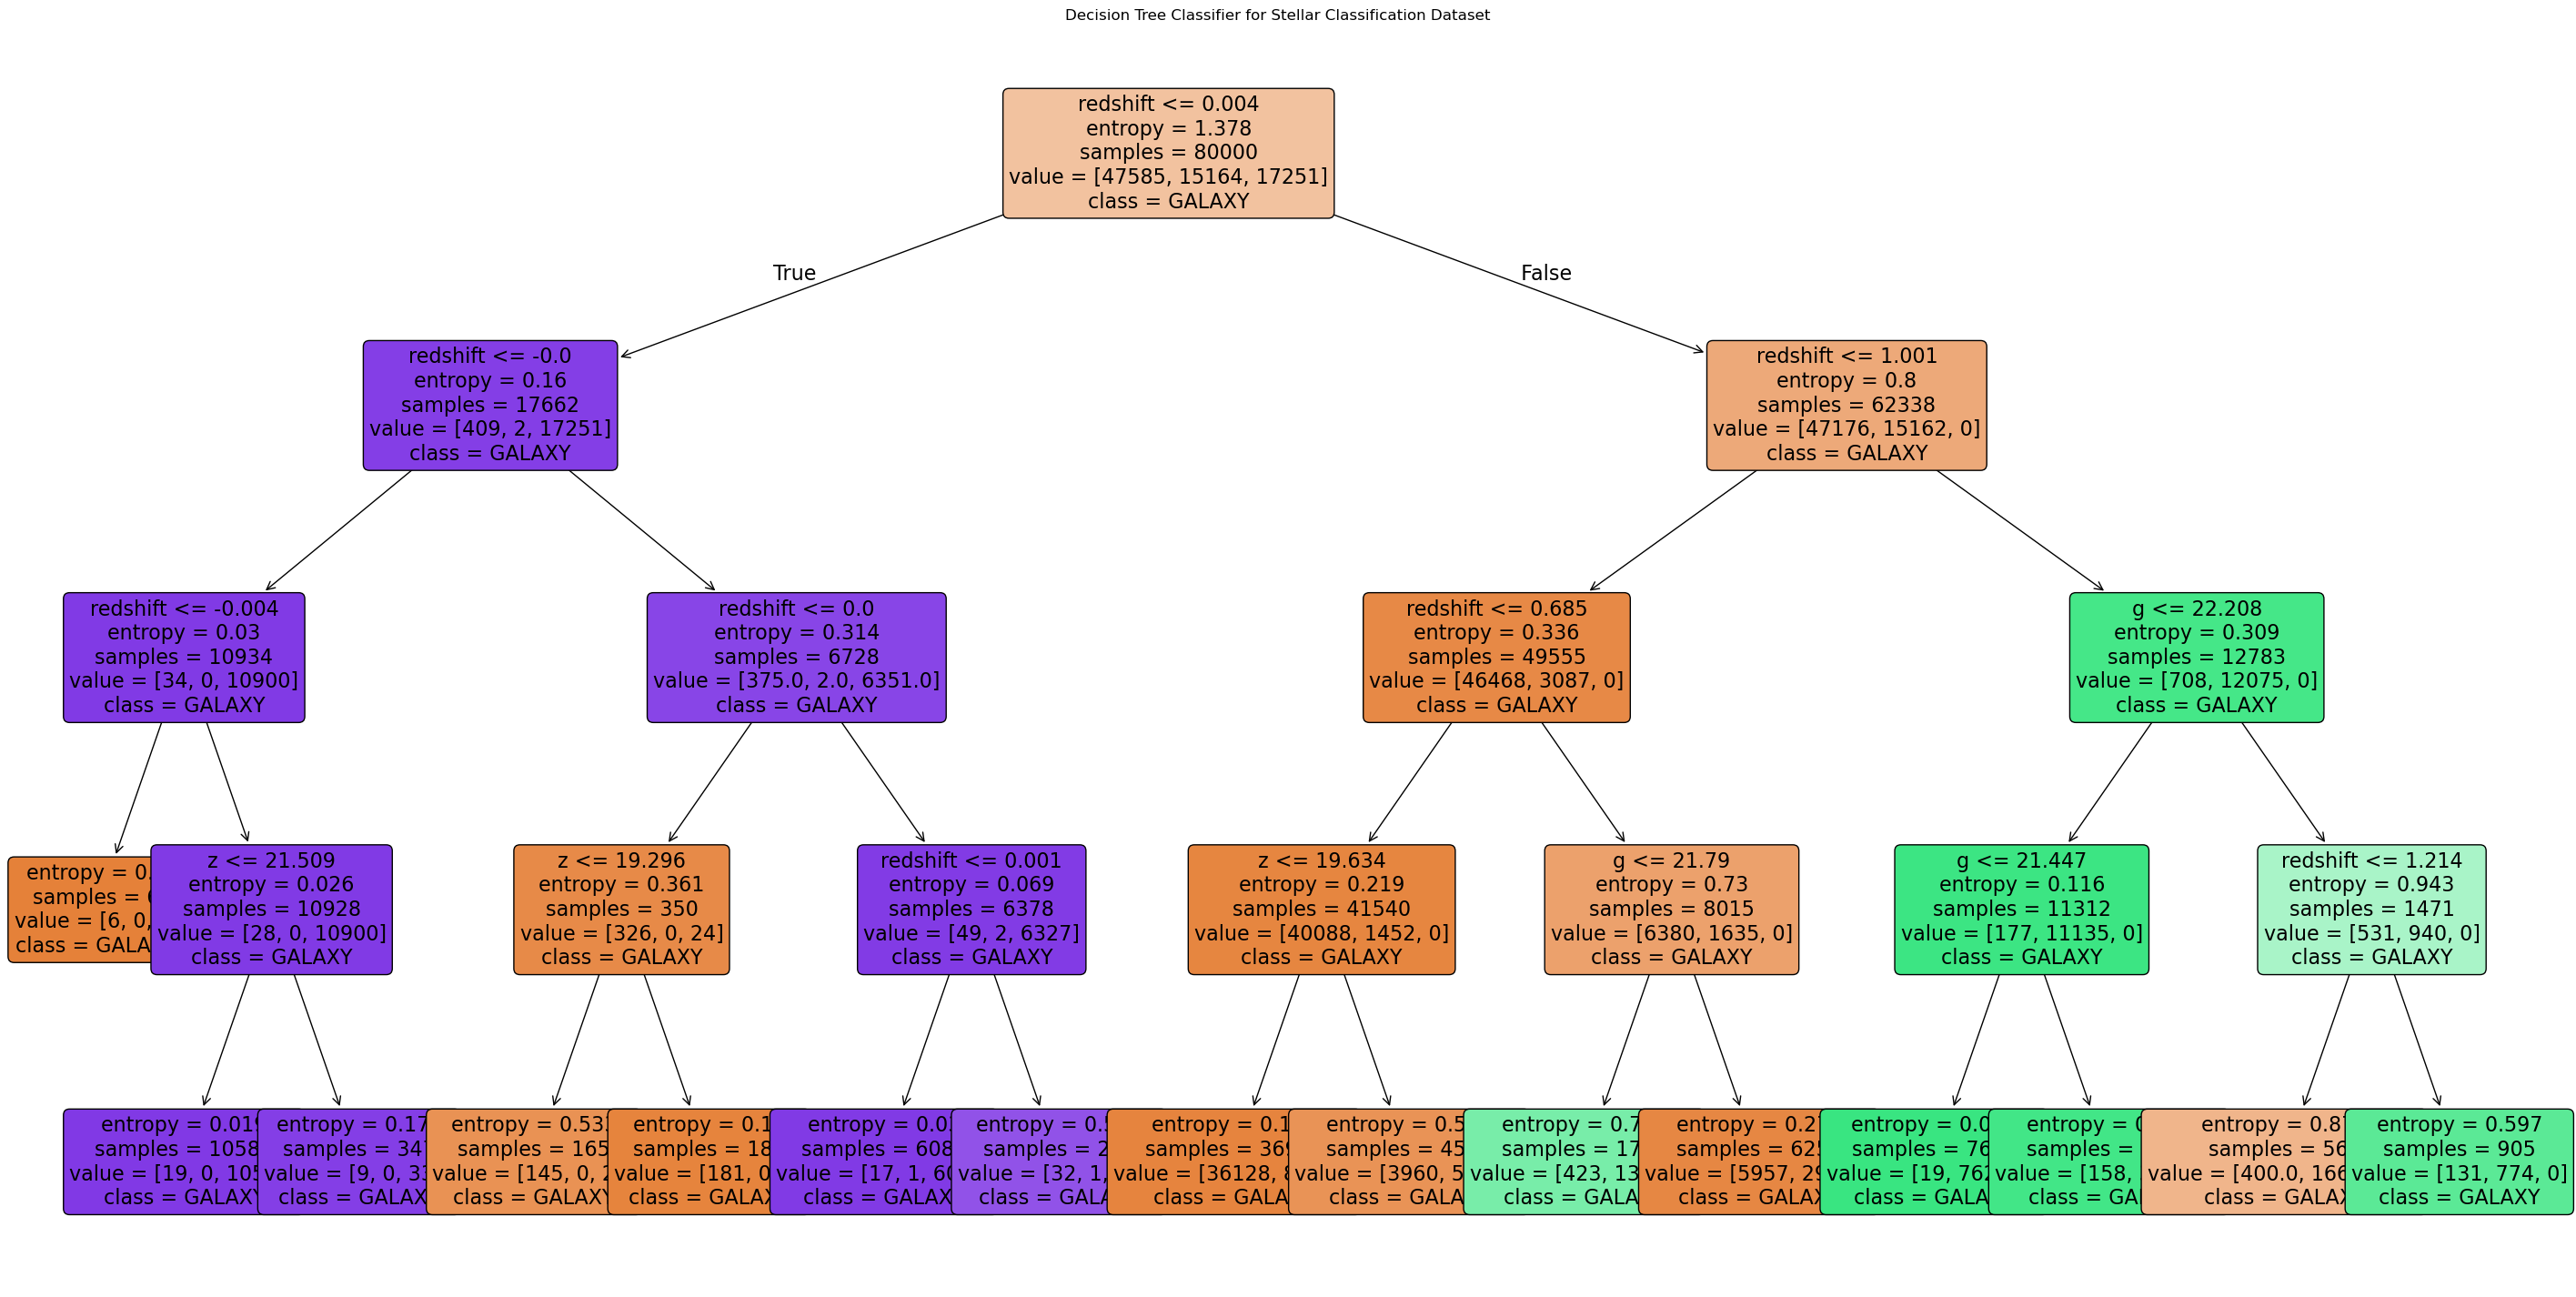

In [7]:
from matplotlib.axis import Axis
from matplotlib.axes import Axes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
    min_samples_leaf=1,
)

model.fit(X_train, y_train)

plt.figure(figsize=(36, 18))
plot_tree(
    model,
    feature_names=X.columns.to_list(),
    class_names=y.values.tolist(),
    rounded=True,
    filled=True,
    fontsize=16,
)
plt.title('Decision Tree Classifier for Stellar Classification Dataset')
plt.show()

### Análise das regras

blah blah

### Treinando com -algoritmo 1 (exemplo: SVM)-

### Treinando com -algoritmo 2-

### Treinando com -algoritmo 3-

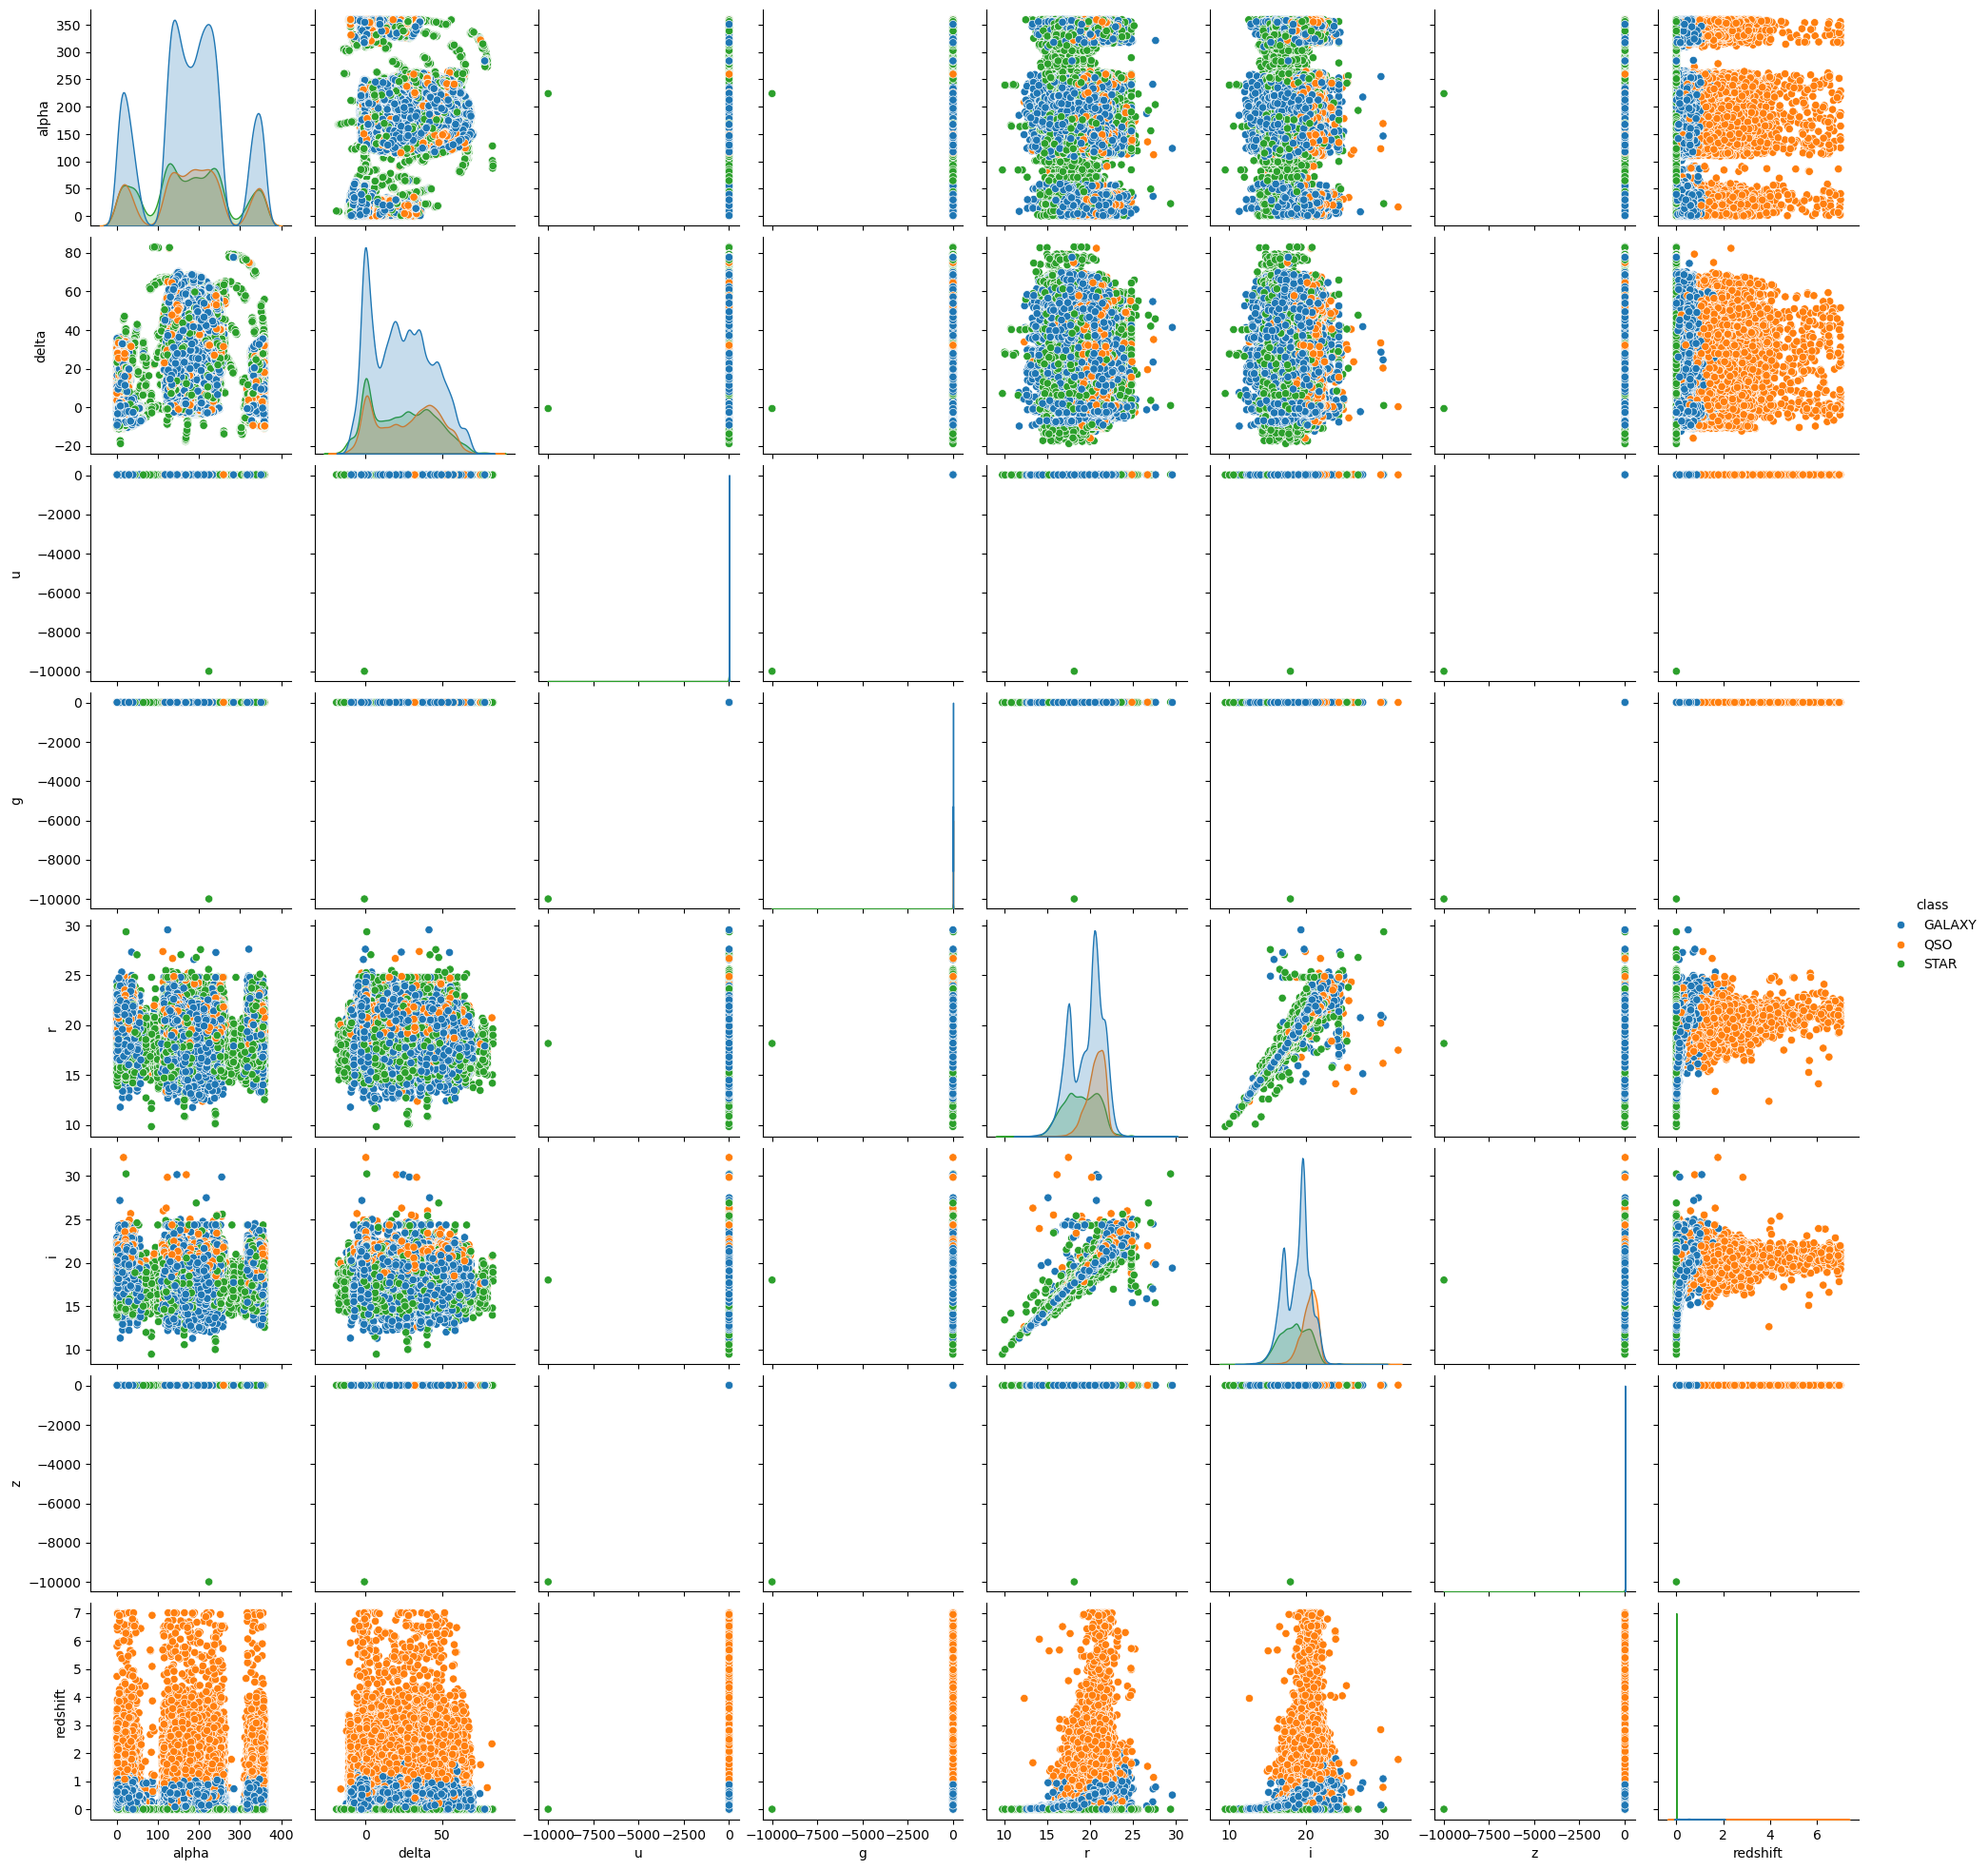

In [8]:
sns.pairplot(df, hue='class')

<Axes: >

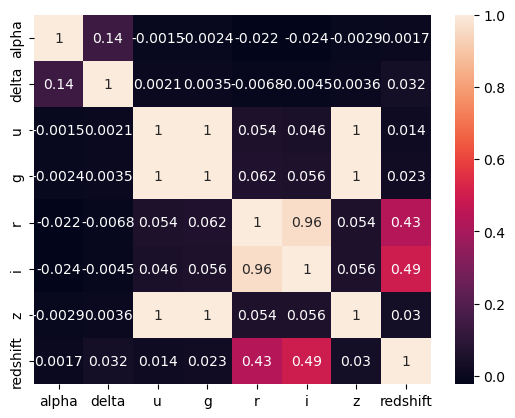

In [10]:
sns.heatmap(X.corr(), annot=True)

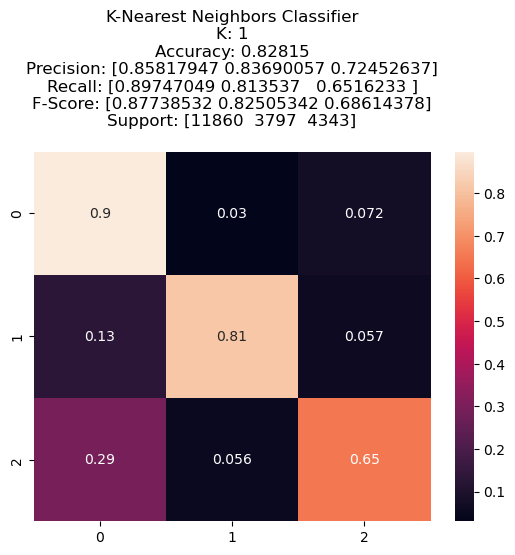

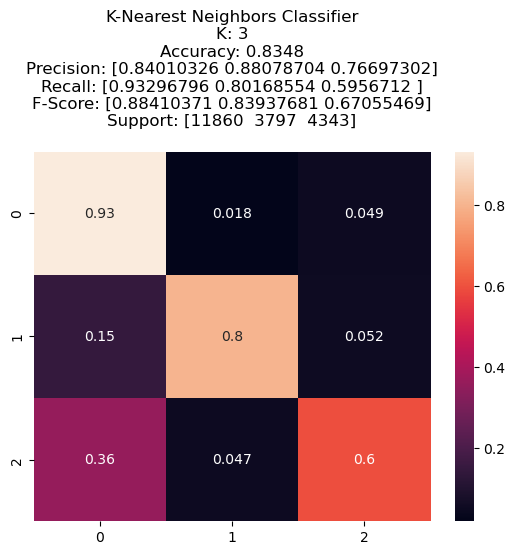

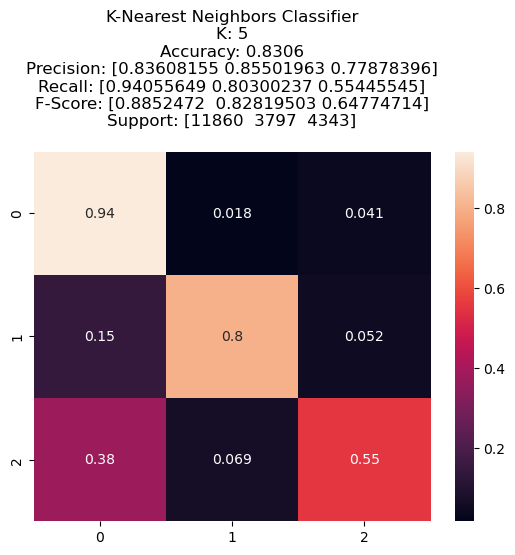

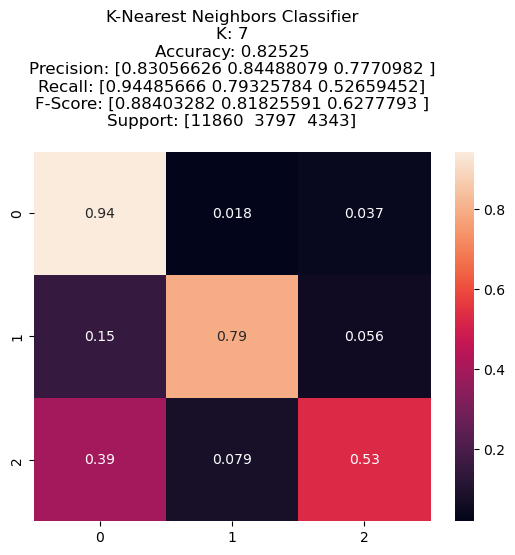

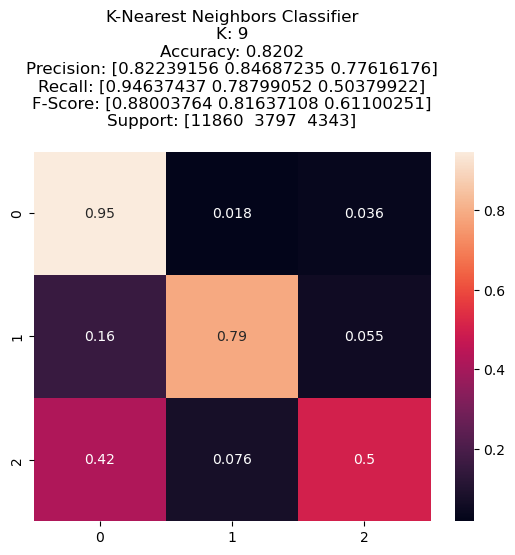

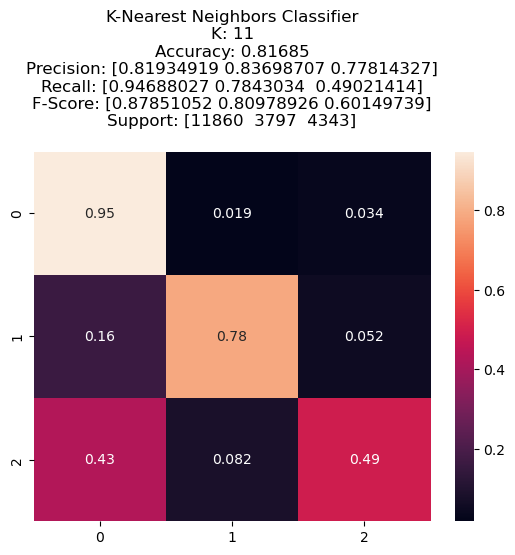

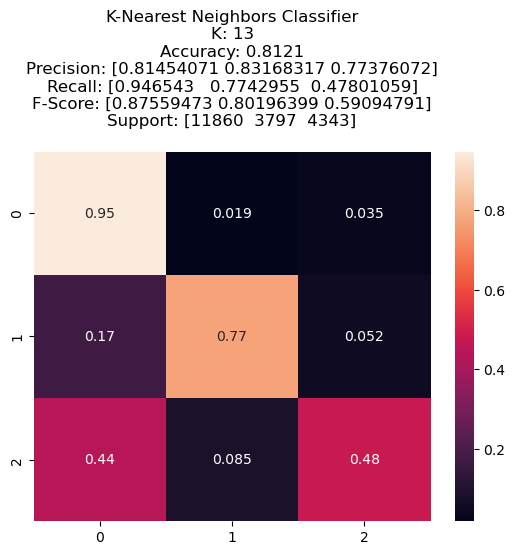

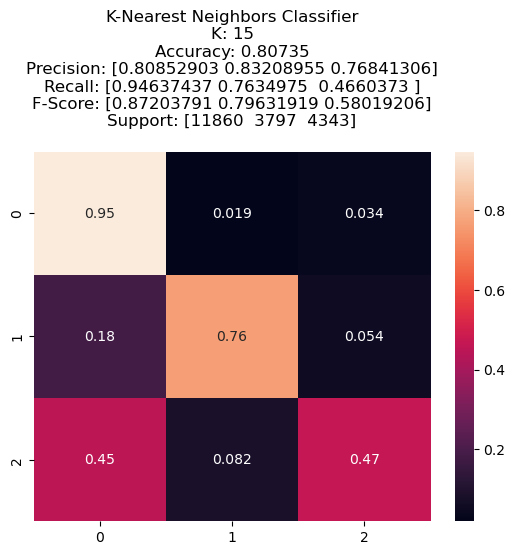

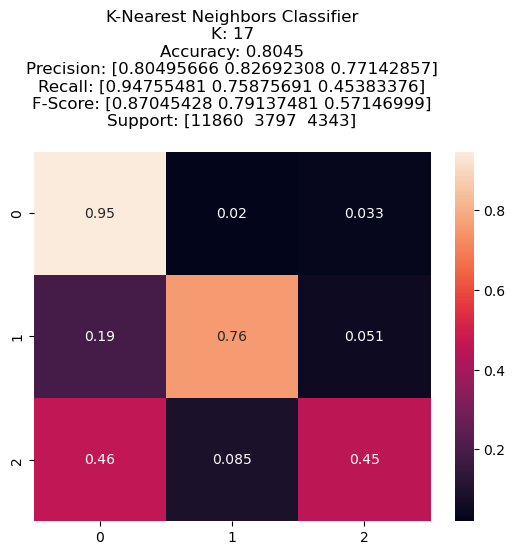

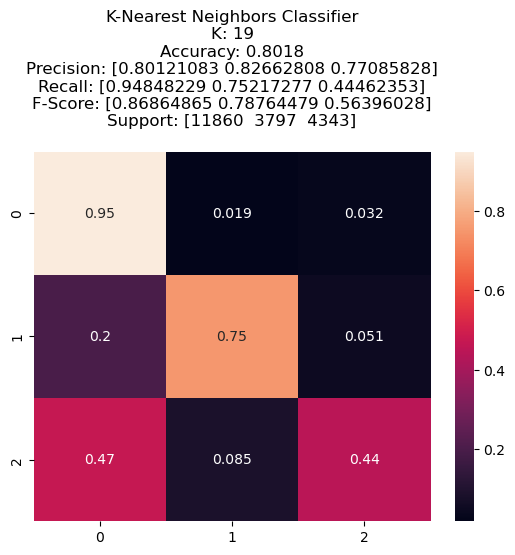

In [11]:
k_ranges = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

for k in k_ranges:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred, normalize='true')
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)

    report = (f'K-Nearest Neighbors Classifier\n'
                f'K: {k}\n'
                f'Accuracy: {acc}\n'
                f'Precision: {precision}\n'
                f'Recall: {recall}\n'
                f'F-Score: {fscore}\n'
                f'Support: {support}\n')
    
    sns.heatmap(matrix, annot=True)
    plt.title(report)
    plt.show()